<a href="https://colab.research.google.com/github/Kiran-Pokhrel-91/Data-Analyst-Projects/blob/main/diabetes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Details of Writer and Notebook
*   Auther: Kiran Pokhrel
*   Date: 6/2/2025
*   email: kiranpokhrel912@gmail.com
*   [Dataset](https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv/data?select=pima-indians-diabetes.csv)
: This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within five years.

### This note book contains analysis of pima indian diabetes and uses SVM model to predict the outcomes (0 or 1)

0-->Non Diabetic

1-->Diabetic

# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Data Collection and Analysis

In [2]:
# importing diabetes dataset to pandas DataFrame
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/Data Analyst Project/diabetes.csv') # PIMA diabetes dataset
diabetes_dataset # seeing top 5 and bottom 5 of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Here, in this dataset `Outcome` is the one that we are intresed to determine and it depend on others parameters thus,

Features: `Pregnancies Glucose BloodPressure SkinThickness Insulin BMI	DiabetesPedigreeFunction Age`

Labels : `Outcome` (0 0r 1)


In [3]:
# learning about columns and their datatypes
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Note: As we see there is no null content and all are numeric which is good for analysis and machine  but,

--------------------------

0 vaues in the diabetes_dataset are mostly likely to be missing value so, we can use

eg:`df['Glucose'] = df['Glucose'].replace(0, np.nan)` to replace 0 to nan and then impute missig value using different measures

-----------------------------


In [4]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in columns:
    diabetes_dataset[col] = diabetes_dataset[col].replace(0,np.nan)

In [5]:
diabetes_dataset.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Now, we can see the real missing values on our datasets which were replaced by zero for convinence

In [6]:
missing_percent = diabetes_dataset.isna().mean() * 100
for col, val in missing_percent.items():
    print(f"{col}: {val:.2f}%")

Pregnancies: 14.45%
Glucose: 0.65%
BloodPressure: 4.56%
SkinThickness: 29.56%
Insulin: 48.70%
BMI: 1.43%
DiabetesPedigreeFunction: 0.00%
Age: 0.00%
Outcome: 0.00%


Here, we have seen the percent of missing values in our dataset. There are non missing values>75% so, there is no need to drop the column.And we can see Insulin has higest missing value.

note: specially in medical data analysis dropping of column is not recomanded

In [7]:
 # Getting statistical measures of the data without handeling missing values
stat_df=diabetes_dataset.describe()
stat_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.861827,110.643863,70.877339,27.235457,130.287879,30.859674,0.429734,31.190000
1,5.669565,142.319549,75.321429,33.000000,206.846154,35.406767,0.550500,37.067164


0-->Non Diabetic

1-->Diabetic

This shows the mean value of features likely to have diabeties eg: People having Gulcode level around or more than 142 are likely to be suffering from diavetes. Some goes for other features.

 **visualizing the data** With missing value

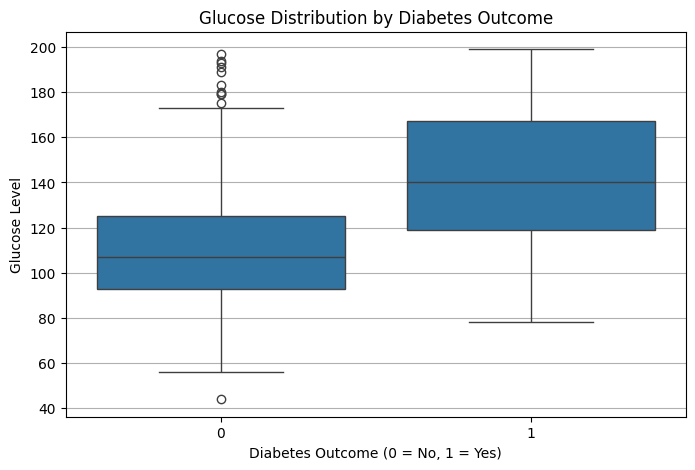

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_dataset)
plt.title('Glucose Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Glucose Level')
plt.grid(True, axis='y')
plt.show()

Here, Outliers should have to be removed for better imputation of missing values in statistical apporach(mean,median or mode) but we are going to use macine learning apporach so no need to remove outliers

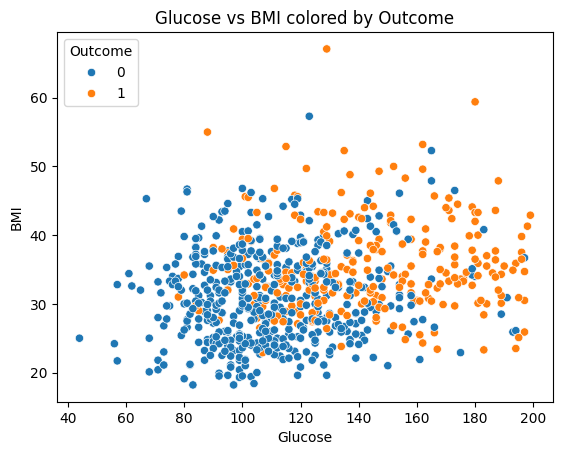

In [10]:
sns.scatterplot(data=diabetes_dataset, x='Glucose', y='BMI', hue='Outcome')
plt.title('Glucose vs BMI colored by Outcome')
plt.show()

# Imputting Missing Values

In [11]:
def mice_impute(df,predictor_cols,max_iter=10,scale=False):
    '''
        This function imputes the missing values of the dataset using MICE
                MICE, or Multiple Imputation by Chained Equations, is a powerful statistical tool used to reconstruct missing data by iteratively estimating
        values based on relationships between variables, similar to a skilled artist restoring a painting.It fills in missing data by creating a series of
        predictive models that take cues from other variables in the dataset. This process continues, refining each missing value until the dataset achieves
        a harmonious completeness, akin to a masterpiece.
        source(https://medium.com/@kunalshrm175/multivariate-imputation-by-chained-equations-mice-2d3efb063434)


        Parameters:
            df (pd.DataFrame) : DataFeame of data  *required
            predictor_cols (str ot list) : single of multiple column which we want to predict missing values
            max_iter(int): Number of ittration to perforn | Defult:10
            scale (bool) : Determines wether to scale data or not using StandardScaler()
        Returns:
            df: pd.DataFrame by imputting missing values
    '''

    df = df.copy()
    if not predictor_cols:
        raise ValueError("predictor_cols must be specified.")
    if scale:
        scaler = StandardScaler()
        df[predictor_cols]=scaler.fit_transform(df[predictor_cols])
    imputer = IterativeImputer(max_iter=max_iter,random_state=0)
    imputed_array = imputer.fit_transform(df[predictor_cols])
    imputed_df = pd.DataFrame(imputed_array,columns=predictor_cols)
    if scale:
        imputed_df[predictor_cols]=scaler.inverse_transform(imputed_df[predictor_cols])
        df[predictor_cols] = imputed_df[predictor_cols]
    return df

In [12]:
predict = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_df = mice_impute(diabetes_dataset, predictor_cols=predict,max_iter=15, scale=True)
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,207.790974,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,69.026754,26.6,0.351,31,0
2,8.000000,183.0,64.0,22.355853,259.925219,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,2.835919,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,166.173694,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,25.919691,167.067159,30.1,0.349,47,1


In [13]:
diabetes_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Finally, Missing value is handled using MICE imputer, Thanks to sklearn

In [14]:
 # Getting statistical measures of the data after handeling missing values
statistical_df=diabetes_df.describe()
statistical_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.516641,121.638564,72.406841,28.834579,150.437744,32.445101,0.471876,33.240885,0.348958
std,2.999379,30.465912,12.149100,9.521309,97.748177,6.881251,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,-31.308370,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,22.000000,88.341110,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,28.305528,129.679651,32.277980,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,188.277372,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Visual represrntation with imputed values

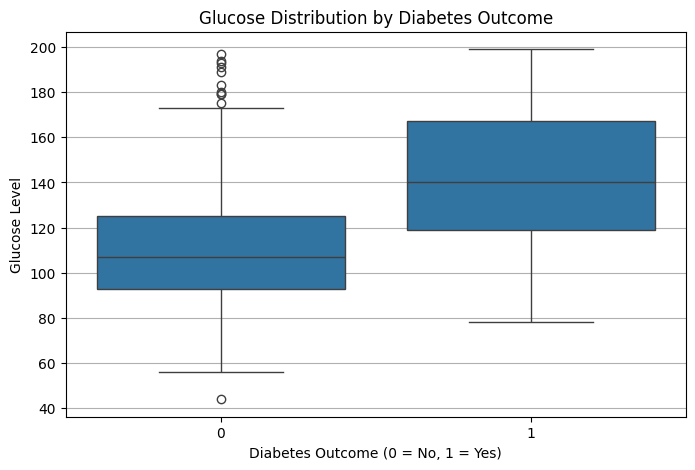

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df)
plt.title('Glucose Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Glucose Level')
plt.grid(True, axis='y')
plt.show()

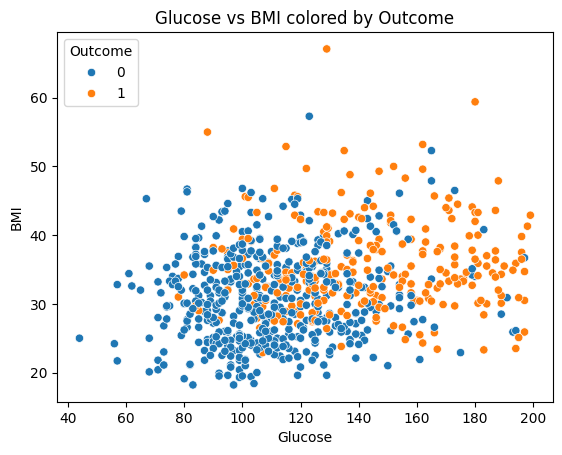

In [16]:
sns.scatterplot(data=diabetes_df, x='Glucose', y='BMI', hue='Outcome')
plt.title('Glucose vs BMI colored by Outcome')
plt.show()

Here, Data with and without imputing missing calues looks same which means our machine learning model to impute missing value works fine

# Developing Machine Learning Model

In [17]:
# Seprating Features and Labels
X = diabetes_df.drop(columns='Outcome',axis=1)
Y = diabetes_df['Outcome']

In [18]:
#Data standarization for Machine Learning
scaler = StandardScaler()
scaler.fit(X)
standarized_data = scaler.transform(X)
X = standarized_data

In [19]:
# Train-Test Split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

Traning the Model

In [20]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Evaluating the Model

In [21]:
# Accuracy Score on Traning Data
X_train_prediction = classifier.predict(X_train)
traning_acc = accuracy_score(X_train_prediction,Y_train)
print(f"Accuract Score: {traning_acc*100:.2f}%")

Accuract Score: 78.01%


In [22]:
# Accuracy Score on Test Data
X_test_prediction = classifier.predict(X_test)
testing_acc = accuracy_score(X_test_prediction,Y_test)
print(f"Accuract Score: {testing_acc*100:.2f}%")

Accuract Score: 74.03%


In [23]:
scores = cross_val_score(classifier, X, Y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy:{scores.mean()*100:.2f}%")

Cross-validated accuracy:77.09%


# Making Predictive System

In [27]:
# Define input
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
input_data = (1, 89, 66, 23, 94, 28.1, 0.167, 21)   # input he value as in columns above (Changing the values to see wether person has diabeties or not)
input_df = pd.DataFrame([input_data], columns=columns)
# Standardize
std_data = scaler.transform(input_df)
prediction = classifier.predict(std_data)
if prediction[0]:
    print("The person is Diabetic")
else:
    print("The person is not Diabetic")

The person is not Diabetic
